In [3]:
import pandas as pd


df = pd.read_csv('linkedin_jobs_germany_clean.csv')


print("5")
print(df.head())
print("\nРазмер датасета:", df.shape)

print("\n")
print(df.info())
print("\n")
print(df.isnull().sum())

Первые 5 строк:
                           Title                                  Company  \
0  Junior Data Analyst (Leipzig)  Zero To One Search | Recruitment Agency   
1           (Junior)Data Analyst                                Datalogue   
2            Junior DATA ANALYST                                 Instaffo   
3           (******)**** *******                      *** ********* *****   
4    ****** **** ******* (*/*/*)                                    *****   

                    Location  \
0   Leipzig, Saxony, Germany   
1  Hamburg, Hamburg, Germany   
2   Munich, Bavaria, Germany   
3  *******, *******, *******   
4  *******, *******, *******   

                                                Link              Keyword  \
0  https://de.linkedin.com/jobs/view/junior-data-...  Junior Data Analyst   
1  https://de.linkedin.com/jobs/view/junior-data-...  Junior Data Analyst   
2  https://de.linkedin.com/jobs/view/junior-data-...  Junior Data Analyst   
3  https://de.linked

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv('linkedin_jobs_germany_clean.csv')


features = [
    'Has_SQL', 'Has_EXCEL', 'Has_POWER_BI', 'Has_TABLEAU', 'Has_R', 'Has_GIT',
    'Has_VBA', 'Has_SAS', 'Has_DATENBANK', 'Has_DATENANALYSE', 'Has_MODELLIERUNG',
    'Has_MS_OFFICE', 'Has_CLOUD', 'Has_BI', 'Has_SAP', 'Has_STATISTIK', 'Has_BIG_DATA',
    'Has_MACHINE_LEARNING', 'Has_ETL', 'Has_MATPLOTLIB', 'Has_PANDAS', 'Has_NUMPY',
    'Has_DASHBOARD', 'Has_REPORTING'
]


X = df[features]
y = df['Has_PYTHON']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print('\nTop 5 with Python')
print(importances.head(5))


              precision    recall  f1-score   support

       False       0.88      0.95      0.91       279
        True       0.93      0.82      0.87       207

    accuracy                           0.90       486
   macro avg       0.90      0.88      0.89       486
weighted avg       0.90      0.90      0.89       486

[[266  13]
 [ 38 169]]

ТОП-5 скиллов, которые чаще всего идут в комплекте с Python:
Has_SQL                 0.170245
Has_MACHINE_LEARNING    0.122080
Has_STATISTIK           0.066455
Has_TABLEAU             0.051001
Has_REPORTING           0.050710
dtype: float64


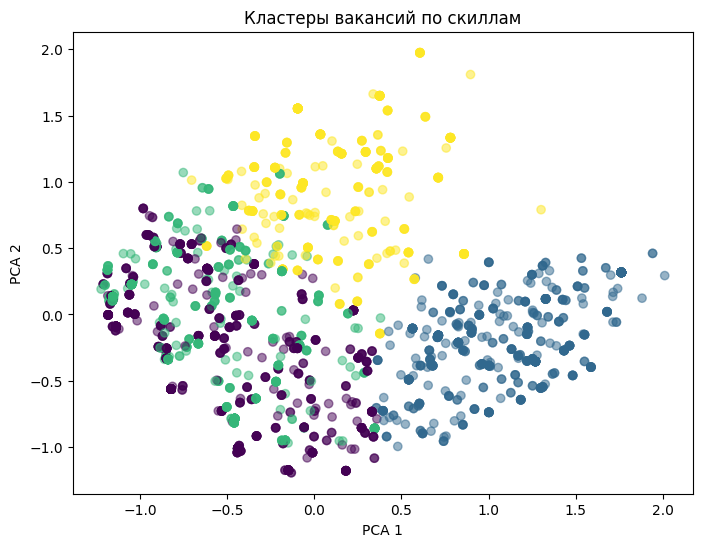


Кластер 0:
Has_R               0.998761
Has_BI              0.976456
Has_DEUTSCH         0.635688
Has_ENGLISCH        0.442379
Has_EXCEL           0.288724
Has_PYTHON          0.252788
Has_SQL             0.147460
Has_SAP             0.137546
Has_DATENANALYSE    0.131351
Has_REPORTING       0.120198
dtype: float64

Кластер 1:
Has_R            1.000000
Has_BI           0.956790
Has_SQL          0.918210
Has_DASHBOARD    0.722222
Has_EXCEL        0.711420
Has_REPORTING    0.658951
Has_PYTHON       0.651235
Has_TABLEAU      0.532407
Has_GIT          0.401235
Has_POWER_BI     0.396605
dtype: float64

Кластер 2:
Has_GIT             1.000000
Has_R               1.000000
Has_BI              0.994836
Has_DEUTSCH         0.690189
Has_ENGLISCH        0.516351
Has_PYTHON          0.197935
Has_EXCEL           0.185886
Has_REPORTING       0.173838
Has_CLOUD           0.134251
Has_DATENANALYSE    0.108434
dtype: float64

Кластер 3:
Has_R            1.000000
Has_BI           0.976923
Has_DEUTSCH    

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


features = [col for col in df.columns if col.startswith('Has_')]
X = df[features].astype(int)


kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Klaster Skills')
plt.show()

for cl in range(4):
    print(f"\nКластер {cl}:")
    print(X[df['cluster']==cl].mean().sort_values(ascending=False).head(10))
